# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (4, 9, 9, 3)
x_pad.shape = (4, 11, 11, 3)
x[1,1] = [[ 0.83600472  1.54335911  0.75880566]
 [ 0.88490881 -0.87728152 -0.86778722]
 [-1.44087602  1.23225307 -0.25417987]
 [ 1.39984394 -0.78191168 -0.43750898]
 [ 0.09542509  0.92145007  0.0607502 ]
 [ 0.21112476  0.01652757  0.17718772]
 [-1.11647002  0.0809271  -0.18657899]
 [-0.05682448  0.49233656 -0.68067814]
 [-0.08450803 -0.29736188  0.417302  ]]
x_pad[1,1] = [[ 0.          0.          0.        ]
 [-1.39662042 -0.86131636  0.67471153]
 [ 0.61853913 -0.44317193  1.81053491]
 [-1.30572692 -0.34498721 -0.23083974]
 [-2.793085    1.93752881  0.36633201]
 [-1.04458938  2.05117344  0.585662  ]
 [ 0.42952614 -0.6069984   0.10622272]
 [-1.52568032  0.79502609 -0.37443832]
 [ 0.1340482   1.20205486  0.28474811]
 [ 0.26246745  0.2764993  -0.7332716 ]
 [ 0.          0.          0.        ]]


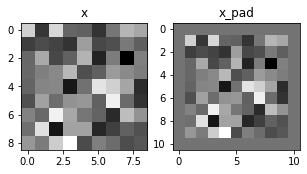

In [3]:
np.random.seed(1)

x = np.random.randn(4, 9, 9, 3)
x_pad = zero_pad(x, 1)

print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [8]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [9]:
np.random.seed(1)
A_prev = np.random.randn(2, 9, 9,3) 
hparameters = {"stride":2, "f":2}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[ 1.62434536  0.86540763  0.53035547]
   [ 1.74481176  1.46210794  1.65980218]
   [ 0.74204416  1.6924546   1.13376944]
   [ 1.14472371  0.90159072  2.10025514]]

  [[ 0.93110208  0.58662319  0.88514116]
   [ 1.19891788  1.25286816  1.12948391]
   [ 1.13162939  1.51981682  2.18557541]
   [ 0.69803203  0.87616892  1.2245077 ]]

  [[ 0.80186103  0.84616065 -0.18656977]
   [ 0.52946532  1.12141771  0.75041164]
   [ 1.96710175  0.23249456  1.27375593]
   [ 2.18697965  0.44136444  0.01740941]]

  [[ 1.90465871  1.16033857  0.6590498 ]
   [ 2.19069973  2.52832571  0.4202822 ]
   [ 0.82400562  0.68006984  1.95487808]
   [ 1.29322588  0.31354772  1.9560789 ]]]


 [[[ 0.88490881  1.54335911  1.81053491]
   [ 1.39984394  1.93752881  0.36633201]
   [ 0.42952614  2.05117344  0.585662  ]
   [ 0.1340482   1.20205486  0.28474811]]

  [[ 2.06578332  0.9561217   1.15528789]
   [ 0.43816635  1.45142926  1.62284909]
   [ 1.3887794   1.12341216  3.03085711]
   [ 0.82458463  0.65458015 -0